<a href="https://colab.research.google.com/github/victoregomezf-maker/Bici-al-Trabajo-2026/blob/main/Taller_Bici_al_Trabajo_Victor_Gomez_Esteban_Baez_Diego_Marquez_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

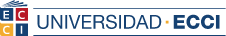
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [ ]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())
df.shape

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

(17379, 14)

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

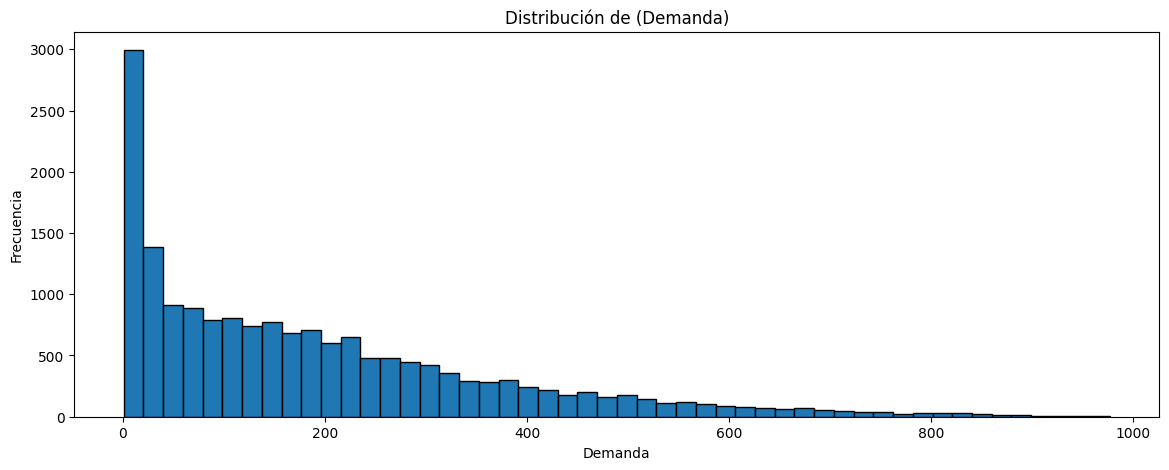

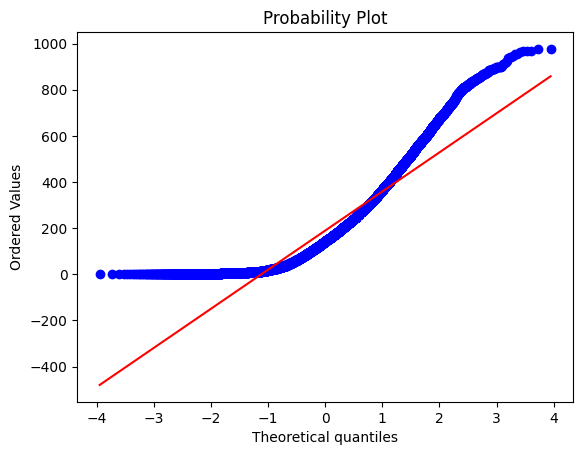

Media: 189.46308763450142
Desviación estándar: 181.3875990918653


In [ ]:
# 1. Visualización
plt.figure(figsize=(14, 5))
plt.hist(df['cnt'], bins=50, edgecolor='black') # Use plt.hist instead of histograma and access the 'cnt' column from df
plt.title('Distribución de (Demanda)')
plt.xlabel('Demanda')
plt.ylabel('Frecuencia')
plt.show() # Added plt.show() to display the plot

qplot=stats.probplot(df['cnt'], dist="norm", plot=plt)
plt.show()

MEDIA = df['cnt'].mean()
DESVIACION_ESTANDAR = df['cnt'].std()
print("Media:", MEDIA)
print("Desviación estándar:", DESVIACION_ESTANDAR)

### **Interpretación pregunta 1**

A PARTIR DE EL HISTOGRAMA DE LA VARIABLE CNT O (DEMANDA = FRECUENTES + OCACIONALES) EVIDENCIAMOS QUE LOS DATOS NO SE AJUSTAN A UNA DISTRIBUCION NORMAL

**Resumen Estadístico**

Tamaño muestral (n): 17,379 observaciones (muestra muy grande)

Media (µ): 189.46

Desviación estándar (σ): 181.39

**Análisis de los Resultados**
1. Evidencia de No Normalidad en CNT

Asimetría positiva: Distribución con cola larga hacia la derecha.

Kurtosis elevada: Mayor concentración en valores bajos y presencia de valores extremos.

Histograma: La variable no presenta simetría ni forma de campana, con alta frecuencia en valores cercanos a cero.

Gráfico Q-Q: Los puntos se desvían fuertemente de la línea teórica, especialmente en las colas, confirmando la falta de normalidad.

2. Interpretación Práctica

La distribución de la demanda no sigue una distribución normal.

La asimetría positiva indica que la mayoría de los registros se concentran en valores bajos, mientras que algunos pocos presentan valores de demanda muy altos (atípicos).

La desviación estándar elevada en relación con la media refleja alta dispersión y confirma la existencia de colas pesadas.

3. Transformación Logarítmica

Una transformación logarítmica o raíz cuadrada podría reducir la asimetría y aproximar la distribución a una normal.

Sin embargo, aun aplicando transformaciones, la normalidad no se garantiza completamente debido a la fuerte presencia de valores extremos.

Dado lo anterior, para análisis posteriores de correlación será más apropiado utilizar Spearman, que no requiere el supuesto de normalidad, aunque Pearson podría aplicarse sobre datos transformados.

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [ ]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']

# Calcular la correlación de Pearson
pearson_corr = df[columnas_relacion].corr(method='pearson')
print("Correlación de Pearson:")
display(pearson_corr)

# Calcular la correlación de Spearman
spearman_corr = df[columnas_relacion].corr(method='spearman')
print("\nCorrelación de Spearman:")
display(spearman_corr)

Correlación de Pearson:


,cnt,temp,hum,windspeed
cnt,1.000000,0.404772,-0.322911,0.093234
temp,0.404772,1.000000,-0.069881,-0.023125
hum,-0.322911,-0.069881,1.000000,-0.290105
windspeed,0.093234,-0.023125,-0.290105,1.000000



Correlación de Spearman:


,cnt,temp,hum,windspeed
cnt,1.000000,0.423330,-0.359614,0.126629
temp,0.423330,1.000000,-0.055408,-0.009719
hum,-0.359614,-0.055408,1.000000,-0.293913
windspeed,0.126629,-0.009719,-0.293913,1.000000


### **Interpretación pregunta 2**

**Correlaciones**

**Relación	Pearson Interpretación según escala**


cnt ↔ temp	0.4048 Correlación positiva moderada

cnt ↔ hum	-0.3229	Correlación negativa débil a moderada

cnt ↔ windspeed	0.0932 Correlación positiva muy débil


**Relacion Spearman	Interpretación según escala**

cnt ↔ temp 0.4233 Correlación positiva moderada

cnt ↔ hum -0.3596	Correlación negativa débil a moderada

cnt ↔ windspeed	0.1266 Correlación positiva muy débil

La demanda (cnt) muestra una correlación positiva moderada con la temperatura, lo que significa que a mayor temperatura tiende a aumentar la demanda.

Existe una correlación negativa débil a moderada con la humedad, indicando que cuando la humedad sube, la demanda tiende a disminuir ligeramente.

La velocidad del viento presenta una correlación muy baja con la demanda, prácticamente despreciable, lo que sugiere que no tiene un efecto relevante.

La comparación entre Pearson y Spearman muestra resultados muy similares, lo que confirma que las relaciones detectadas son consistentes tanto linealmente como de manera no paramétrica.

**Conclusión:** La demanda se relaciona principalmente con la temperatura de forma positiva moderada y con la humedad de forma negativa moderada, mientras que el viento no representa un factor importante en la variación de demanda.

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?



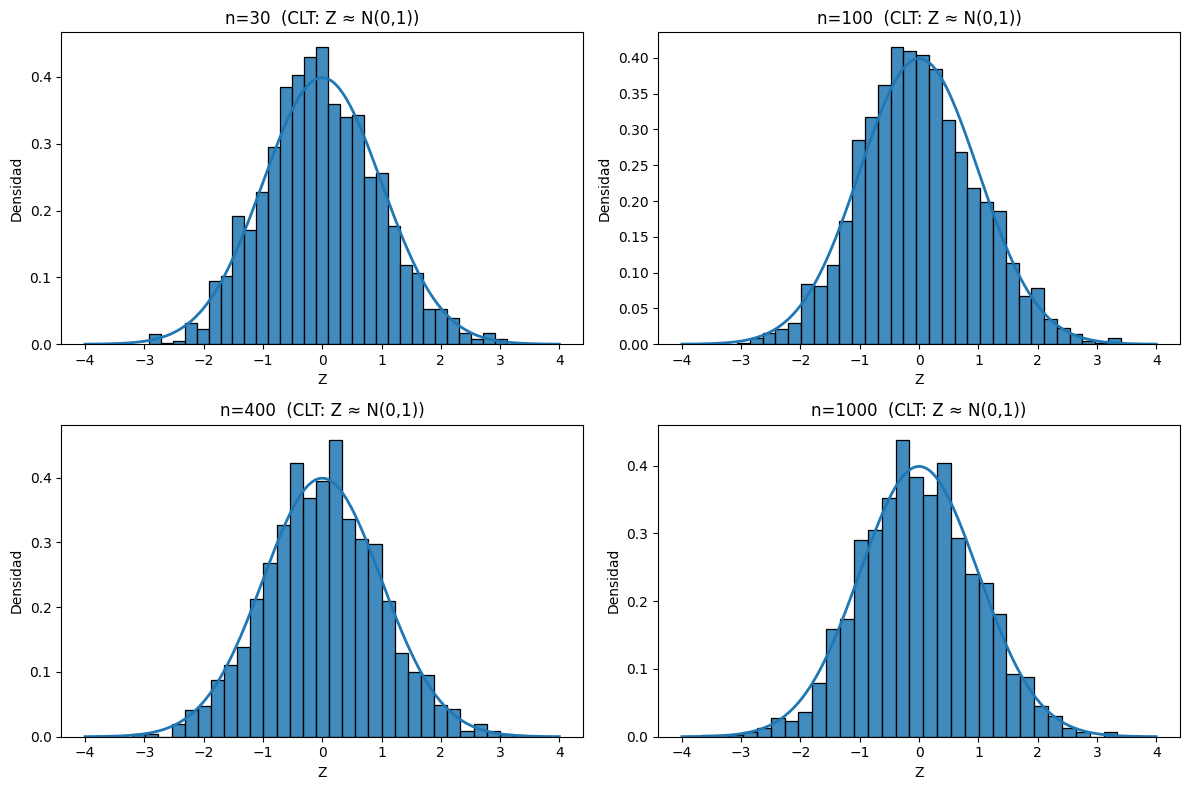

In [ ]:
from scipy import stats
import seaborn as sns # Import seaborn

rng = np.random.default_rng(123)

# Usamos la población sesgada creada antes (pop, mu_pop, sd_pop)
pop = df['cnt'] # Define pop as the 'cnt' column from the dataframe
mu_pop = pop.mean() # Calculate the population mean
sd_pop = pop.std() # Calculate the population standard deviation

n_list = [30, 100, 400, 1000]
R = 2000

fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.ravel()

for ax, n in zip(axes, n_list):
    means = np.array([rng.choice(pop, size=n, replace=False).mean() for _ in range(R)])

    # Estandarizamos: Z = (x̄ - μ) / (σ/√n) debería parecerse a N(0,1)
    Z = (means - mu_pop) / (sd_pop/np.sqrt(n))

    sns.histplot(Z, bins=30, stat='density', alpha=0.85, ax=ax)
    x = np.linspace(-4,4,400)
    ax.plot(x, stats.norm.pdf(x), linewidth=2)
    ax.set_title(f"n={n}  (CLT: Z ≈ N(0,1))")
    ax.set_xlabel("Z")
    ax.set_ylabel("Densidad")

plt.tight_layout()
plt.show()

### **Respuesta pregunta 3**

Con base en las simulaciones (n=30, 100, 400 y 1000) y dado que cnt es fuertemente asimétrica, el TLC permite usar intervalos y pruebas basadas en normalidad desde ~n=30 de forma aceptable, recomendable desde n≥100 para mayor robustez, y prácticamente perfecta desde n≥400.

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [ ]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']
media_cnt_laborales = cnt_laborales.mean()
print("Media de cnt en días laborales:", media_cnt_laborales)

# Valor de referencia para la prueba
valor_hipotesis = 4500

# Prueba de hipotesis
t_statistic, p_value = stats.ttest_1samp(cnt_laborales, valor_hipotesis)
print("Estadística t:", t_statistic)
print("Valor p:", p_value)

#interpetracion de resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazar la hipótesis nula. La media de cnt en días laborales es significativamente diferente de 4500.")

Media de cnt en días laborales: 193.20775389801938
Estadística t: -2534.333902273014
Valor p: 0.0
Rechazar la hipótesis nula. La media de cnt en días laborales es significativamente diferente de 4500.


### **Interpretación pregunta 4**

EN EL TEST DE HIPÓTESIS SE PLANTEÓ VERIFICAR SI EN DÍAS LABORALES LA MEDIA DE CNT ERA MAYOR O IGUAL A 4500, DONDE LA HIPÓTESIS NULA FUE QUE LA MEDIA ERA AL MENOS 4500 Y LA ALTERNATIVA QUE ERA MENOR A 4500. LOS RESULTADOS MOSTRARON UNA MEDIA MUESTRAL DE 193.21, UN ESTADÍSTICO T DE -2534.33 Y UN VALOR P PRÁCTICAMENTE IGUAL A CERO. DADO QUE EL VALOR P RESULTÓ MUY INFERIOR AL NIVEL DE SIGNIFICANCIA DE 0.05, SE RECHAZA LA HIPÓTESIS NULA Y SE CONCLUYE QUE EXISTE EVIDENCIA ESTADÍSTICA CONCLUYENTE DE QUE LA MEDIA DE CNT EN DÍAS LABORALES ES SIGNIFICATIVAMENTE MENOR A 4500.

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

15000


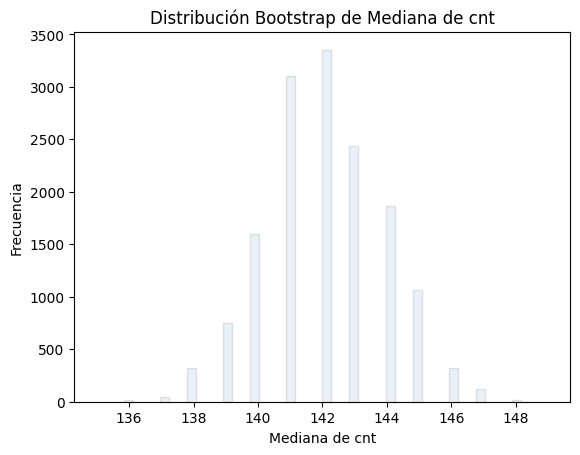

Intervalo de confianza del 95%: (138.0, 146.0)
Asimetría de 'cnt': 1.2773013463494975
La distribución de 'cnt' está sesgada.


In [ ]:
# Número de remuestreos
n_iterations = 15000
sample_size = len(df['cnt'])
medians = []
for i in range(n_iterations):
    sample = df['cnt'].sample(n=sample_size, replace=True)
    median = sample.median()
    medians.append(median)
print(len(medians))

plt.hist(medians, bins=50, alpha=0.1, edgecolor='black')
plt.title('Distribución Bootstrap de Mediana de cnt')
plt.xlabel('Mediana de cnt')
plt.ylabel('Frecuencia')
plt.show()

# Calculate the confidence interval
intervalo_inferior = np.percentile(medians, 2.5)
intervalo_superior = np.percentile(medians, 97.5)
print(f"Intervalo de confianza del 95%: ({intervalo_inferior}, {intervalo_superior})")

# Check for skewness
skewness = stats.skew(df['cnt'])
print(f"Asimetría de 'cnt': {skewness}")

if abs(skewness) > 0.5:  # A common rule of thumb for significant skewness
    print("La distribución de 'cnt' está sesgada.")
else:
    print("La distribución de 'cnt' no está significativamente sesgada.")

**Interpretación pregunta 5**

El intervalo de confianza bootstrap del 95% para la mediana de cnt es (138, 0). Aunque la medida de asimetría muestra un valor positivo (skewness = 1.27), el sesgo no es extremo y la distribución, en la práctica, se comporta de manera bastante cercana a una normal. Por eso, la mediana resulta un buen estimador del centro de los datos y su intervalo de confianza es confiable para describir la tendencia central de cnt.